Check to see if pixel values increase or decrease when comparing flight to qui- make sure there is no obvious muscle that is responsible for keeping the wing remoted.

In [10]:
import group_data as gd
%matplotlib inline
%config InlineBackend.figure_format = 'svg' #svg
import pylab as plb
import numpy as np
import scipy as sp
import flylib as flb
import group_data as gd
plb.rcParams['pdf.fonttype'] = 42 #allows text in saved .pdf files to be edited in illustrator
plb.rcParams['image.interpolation'] = 'Nearest'
plb.rcParams['image.cmap'] = 'BrBG'
recalc_means = False #recalculate the groupwise mean stats. Set to False to load from file
demo_mode = False
import warnings
warnings.filterwarnings('ignore')
import h5py

In [49]:
def get_qui_and_flight(fly):
    fly_record = h5py.File(fly.fly_path + 'fly_record.hdf5','r')
    exp_record = fly_record['experiments'].values()[0]
    imgs = np.array(exp_record['tiff_data']['images'])
    f = open(fly.fly_path + 'epoch_data.cpkl')
    import cPickle
    baseline_range = cPickle.load(f)['baseline_F']
    f.close()
    wb_frequency = np.array(exp_record['tiff_data']['axon_framebase']['wb_frequency'])[:-1]
    np.shape(wb_frequency)
    flt_mask = wb_frequency > 5
    baseline = np.mean(imgs[baseline_range],axis = 0)
    flt = np.mean(imgs[flt_mask][::10],axis = 0)
    return flt,baseline

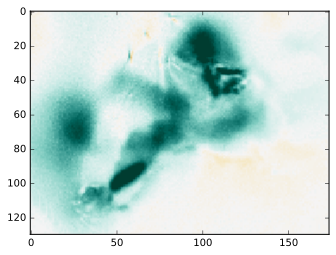

In [61]:
flylist = gd.swarms['GMR22H05'].flies
fly = flylist[2]
flt,baseline = get_qui_and_flight(fly)
plb.imshow(flt-baseline,vmin = -20, vmax = 20)